In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('ggplot')


TRANSPARENT = True
MAX_INDEX = 3200
MOVING_AVERAGE_WINDOW = 100
out_prefix = 'img_'

rewards = []
q_values = []
losses = []

rewards.append({ 'data':  np.loadtxt('FCv1_rewards.csv'), 'label': 'FC',})
#rewards.append({ 'data':  np.loadtxt('FC_rewards.csv'), 'label': 'FC'})
rewards.append({ 'data':  np.loadtxt('CNN_rewards.csv'), 'label': 'CNN'})
# rewards.append({ 'data':  np.loadtxt('transfer_pretrained_rewards.csv'), 'label': 'TL_pretrained'})
# rewards.append({ 'data':  np.loadtxt('transfer_raw_rewards.csv'), 'label': 'TL_raw'})

q_values.append({ 'data': np.loadtxt('FCv1_q.csv'), 'label': 'FC'})
#q_values.append({ 'data': np.loadtxt('FC_q.csv'), 'label': 'FC_q'})
q_values.append({ 'data': np.loadtxt('CNN_q.csv'), 'label': 'CNN'})
# q_values.append({ 'data': np.loadtxt('transfer_pretrained_q.csv'), 'label': 'TL_pretrained'})
# q_values.append({ 'data': np.loadtxt('transfer_raw_q.csv'), 'label': 'TL_raw'})

losses.append({ 'data': np.loadtxt('FCv1_loss.csv'), 'label': 'FC'})
#losses.append({ 'data': np.loadtxt('FC_loss.csv'), 'label': 'FC_loss'})
losses.append({ 'data': np.loadtxt('CNN_loss.csv'), 'label': 'CNN'})
# losses.append({ 'data': np.loadtxt('transfer_pretrained_loss.csv'), 'label': 'TL_pretrained'})
# losses.append({ 'data': np.loadtxt('transfer_raw_loss.csv'), 'label': 'TL_raw'})

data = {'Rewards': rewards, 'Q-values': q_values, 'Losses': losses}


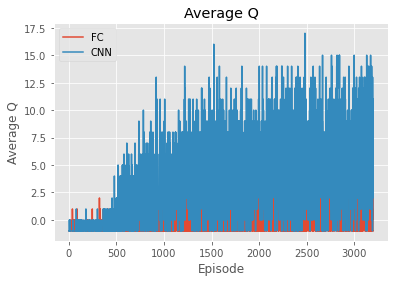

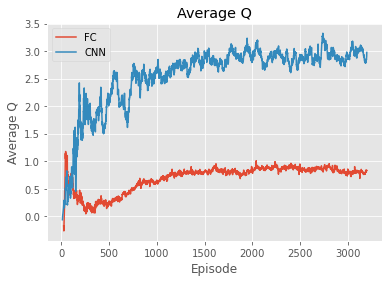

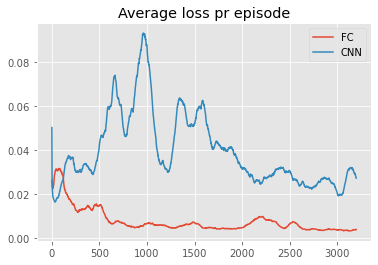

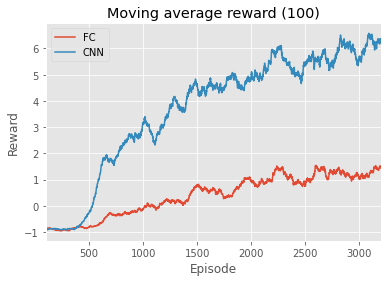

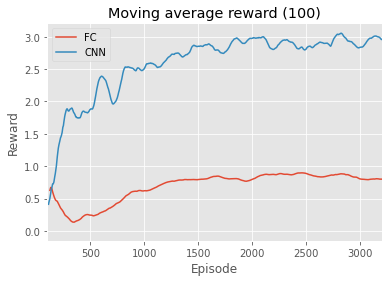

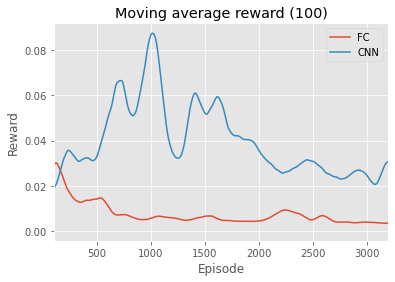

In [4]:
fig = plt.figure()

def plot(data, label):
    if MAX_INDEX == 0:
        plt.plot(data, label=label)
    else:
        plt.plot(data[0:MAX_INDEX], label=label)

#Average {q-value,rewards} pr episode
for i, key in enumerate(data):
    if(key == 'Losses'):
        continue
    plt.title('Average Q')
    for d in data[key]:
        plot(d['data'],d['label'])
    plt.xlabel('Episode')
    plt.ylabel('Average Q')
    plt.legend()
    plt.show()
    fig.savefig(out_prefix + 'Average_' + key + '_pr_episode.png',transparent=TRANSPARENT)

# Average loss pr episode
plt.title('Average loss pr episode')
for d in data['Losses']:
    d['data'] = np.convolve(d['data'], np.ones((100,))/100, mode='valid')
    plot(d['data'],d['label'])

plt.legend()
plt.show()
fig.savefig(out_prefix + 'Average_loss_pr_episode.png',transparent=TRANSPARENT)

    
# Moving average

for i, key in enumerate(data):
    for d, obj in enumerate(data[key]):
        obj['moving_average'] = []
        for j in range(0, len(obj['data'])):   
            if j >= MOVING_AVERAGE_WINDOW:
                obj['moving_average'].append(np.mean(obj['data'][j-MOVING_AVERAGE_WINDOW:j])) 
            else:
                data[key][d]['moving_average'].append(0)
        plot(obj['moving_average'],obj['label'])
    plt.title('Moving average reward (100)')
    plt.legend()
    plt.xlim(MOVING_AVERAGE_WINDOW,MAX_INDEX)
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.show()
    fig.savefig(out_prefix + 'MovingAverage_' + key + '_pr_episode.png',transparent=TRANSPARENT)
